# Notebook : Palmer Archipelago (Antarctica) penguin data

Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

Thank you to **Dr. Gorman**, Palmer Station LTER and the LTER Network! Special thanks to Marty Downs (Director, LTER Network Office) for help regarding the data license & use.


## Summary

The data folder contains two CSV files. For intro courses/examples, you probably want to use the first one (penguins_size.csv).

**penguins_size.csv**: *Simplified data from original penguin data sets*

Contains variables:

*species*: penguin species (Chinstrap, Adélie, or Gentoo)
*culmen_length_mm*: culmen length (mm)
*culmen_depth_mm*: culmen depth (mm)
*flipper_length_mm*: flipper length (mm)
*body_mass_g*: body mass (g)
*island*: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
*sex*: penguin sex

*penguins_lter.csv*: Original combined data for 3 penguin species (aggregated from individual links below)


## What are culmen length & depth?

The **culmen** is *"the upper ridge of a bird's beak"* (definition from Oxford Languages).

## Importer les bibliothèques

In [116]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Importer les données

In [117]:
df = pd.read_csv('data/penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [98]:
df.shape

(344, 7)

## Valeurs Manquantes

In [118]:
print(df.isnull().values.any())

True


In [119]:
print(df.isnull().sum())

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64


In [120]:
# Dropping rows that contain NaN
df = df.dropna()

In [121]:
print(df.isnull().values.any())

False


In [122]:
df.shape

(334, 7)

## Outliers

In [104]:
import math

def boxplot_visualizer(df, columns_list):

    sns.set(style="ticks") 
    
    list_len = len(columns_list)
    ncols = 3
    nrows = math.ceil(list_len / ncols)

    for index, col in enumerate(columns_list):
        plt.subplot(nrows, ncols, index+1)
        sns.boxplot(data=df, y=df[col]) # Only numerical values for y
    plt.show()

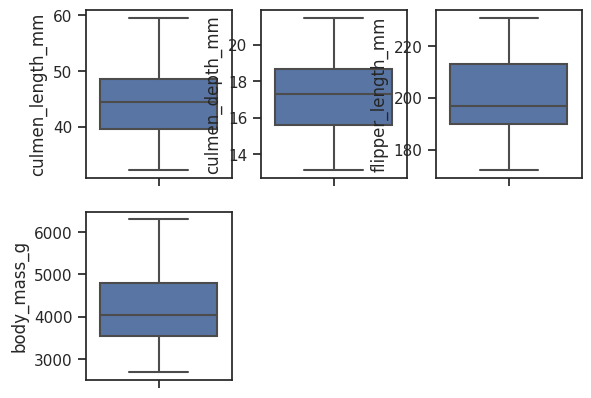

In [105]:
boxplot_visualizer(df, ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g'])

## Nettoyage

In [123]:
# Deleting row with 'sex' = '.'
df = df[df.sex != '.']

## Analyse statistique de base

In [124]:
df.groupby('species').describe()

culmen_length_mm                                                    \
                     count       mean       std   min     25%    50%     75%   
species                                                                        
Adelie               146.0  38.823973  2.662597  32.1  36.725  38.85  40.775   
Chinstrap             68.0  48.833824  3.339256  40.9  46.350  49.55  51.075   
Gentoo               119.0  47.568067  3.106116  40.9  45.350  47.40  49.600   

                culmen_depth_mm             ... flipper_length_mm         \
            max           count       mean  ...               75%    max   
species                                     ...                            
Adelie     46.0           146.0  18.347260  ...             195.0  210.0   
Chinstrap  58.0            68.0  18.420588  ...             201.0  212.0   
Gentoo     59.6           119.0  14.996639  ...             221.5  231.0   

          body_mass_g                                                   \
                count         mean         std     min     25%     50%   
species                                                                  
Adelie          146.0  3706.164384  458.620135  2850.0  3362.5  3700.0   
Chinstrap        68.0  3733.088235  384.335081  2700.0  3487.5  3700.0   
Gentoo          119.0  5092.436975  501.476154  3950.0  4700.0  5050.0   

                           
              75%     max  
species                    
Adelie     4000.0  4775.0  
Chinstrap  3950.0  4800.0  
Gentoo     5500.0  6300.0  

[3 rows x 32 columns]

In [125]:
df.groupby('sex').agg(['mean', 'median'])

/tmp/ipykernel_621/2527321126.py:1: FutureWarning: ['species', 'island'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby('sex').agg(['mean', 'median'])


culmen_length_mm        culmen_depth_mm        flipper_length_mm  \
                   mean median            mean median              mean   
sex                                                                       
FEMALE        42.096970   42.8       16.425455  17.00        197.363636   
MALE          45.854762   46.8       17.891071  18.45        204.505952   

               body_mass_g          
       median         mean  median  
sex                                 
FEMALE  193.0  3862.272727  3650.0  
MALE    200.5  4545.684524  4300.0

In [126]:
df.groupby(['sex', 'species', 'island']).agg(['mean', 'median'])

culmen_length_mm        culmen_depth_mm         \
                                       mean median            mean median   
sex    species   island                                                     
FEMALE Adelie    Biscoe           37.359091  37.75       17.704545  17.70   
                 Dream            36.911111  36.80       17.618519  17.80   
                 Torgersen        37.554167  37.60       17.550000  17.45   
       Chinstrap Dream            46.573529  46.30       17.588235  17.65   
       Gentoo    Biscoe           45.563793  45.50       14.237931  14.25   
MALE   Adelie    Biscoe           40.590909  40.80       19.036364  18.90   
                 Dream            40.071429  40.25       18.839286  18.65   
                 Torgersen        40.586957  41.10       19.391304  19.20   
       Chinstrap Dream            51.094118  50.95       19.252941  19.30   
       Gentoo    Biscoe           49.473770  49.50       15.718033  15.70   

                           flipper_length_mm         body_mass_g          
                                        mean median         mean  median  
sex    species   island                                                   
FEMALE Adelie    Biscoe           187.181818  187.0  3369.318182  3375.0  
                 Dream            187.851852  188.0  3344.444444  3400.0  
                 Torgersen        188.291667  189.0  3395.833333  3400.0  
       Chinstrap Dream            191.735294  192.0  3527.205882  3550.0  
       Gentoo    Biscoe           212.706897  212.0  4679.741379  4700.0  
MALE   Adelie    Biscoe           190.409091  191.0  4050.000000  4000.0  
                 Dream            191.928571  190.5  4045.535714  3987.5  
                 Torgersen        194.913043  195.0  4034.782609  4000.0  
       Chinstrap Dream            199.911765  200.5  3938.970588  3950.0  
       Gentoo    Biscoe           221.540984  221.0  5484.836066  5500.0

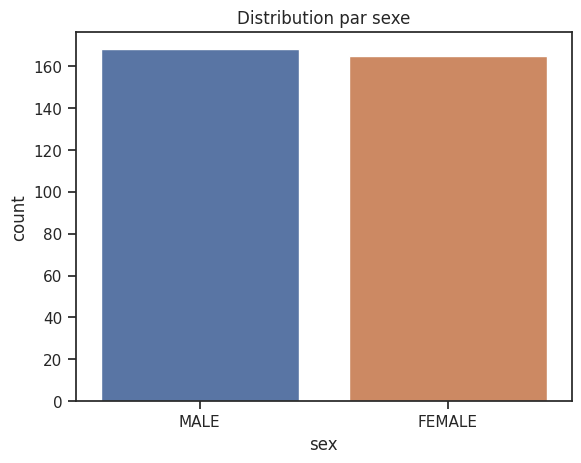

In [127]:
# Distribution par sexe
sns.countplot(data=df, x='sex')
plt.title('Distribution par sexe')
plt.show()

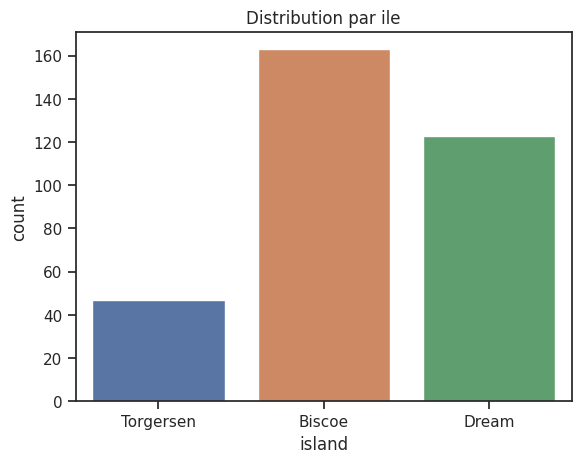

In [111]:
# Distribution par Islan
sns.countplot(data=df, x='island')
plt.title('Distribution par ile')
plt.show()

## Encoder

In [129]:
from sklearn.preprocessing import LabelEncoder

labelencoder_species = LabelEncoder()
df['species_enc'] = labelencoder_species.fit_transform(df['species'])

labelencoder_sex = LabelEncoder()
df['sex_enc'] = labelencoder_sex.fit_transform(df['sex'])

labelencoder_island = LabelEncoder()
df['island_enc'] = labelencoder_island.fit_transform(df['island'])

print(labelencoder_species.classes_)
print(labelencoder_sex.classes_)
print(labelencoder_island.classes_)

['Adelie' 'Chinstrap' 'Gentoo']
['FEMALE' 'MALE']
['Biscoe' 'Dream' 'Torgersen']


## Pairplot

/home/david/workspace/py-sql/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


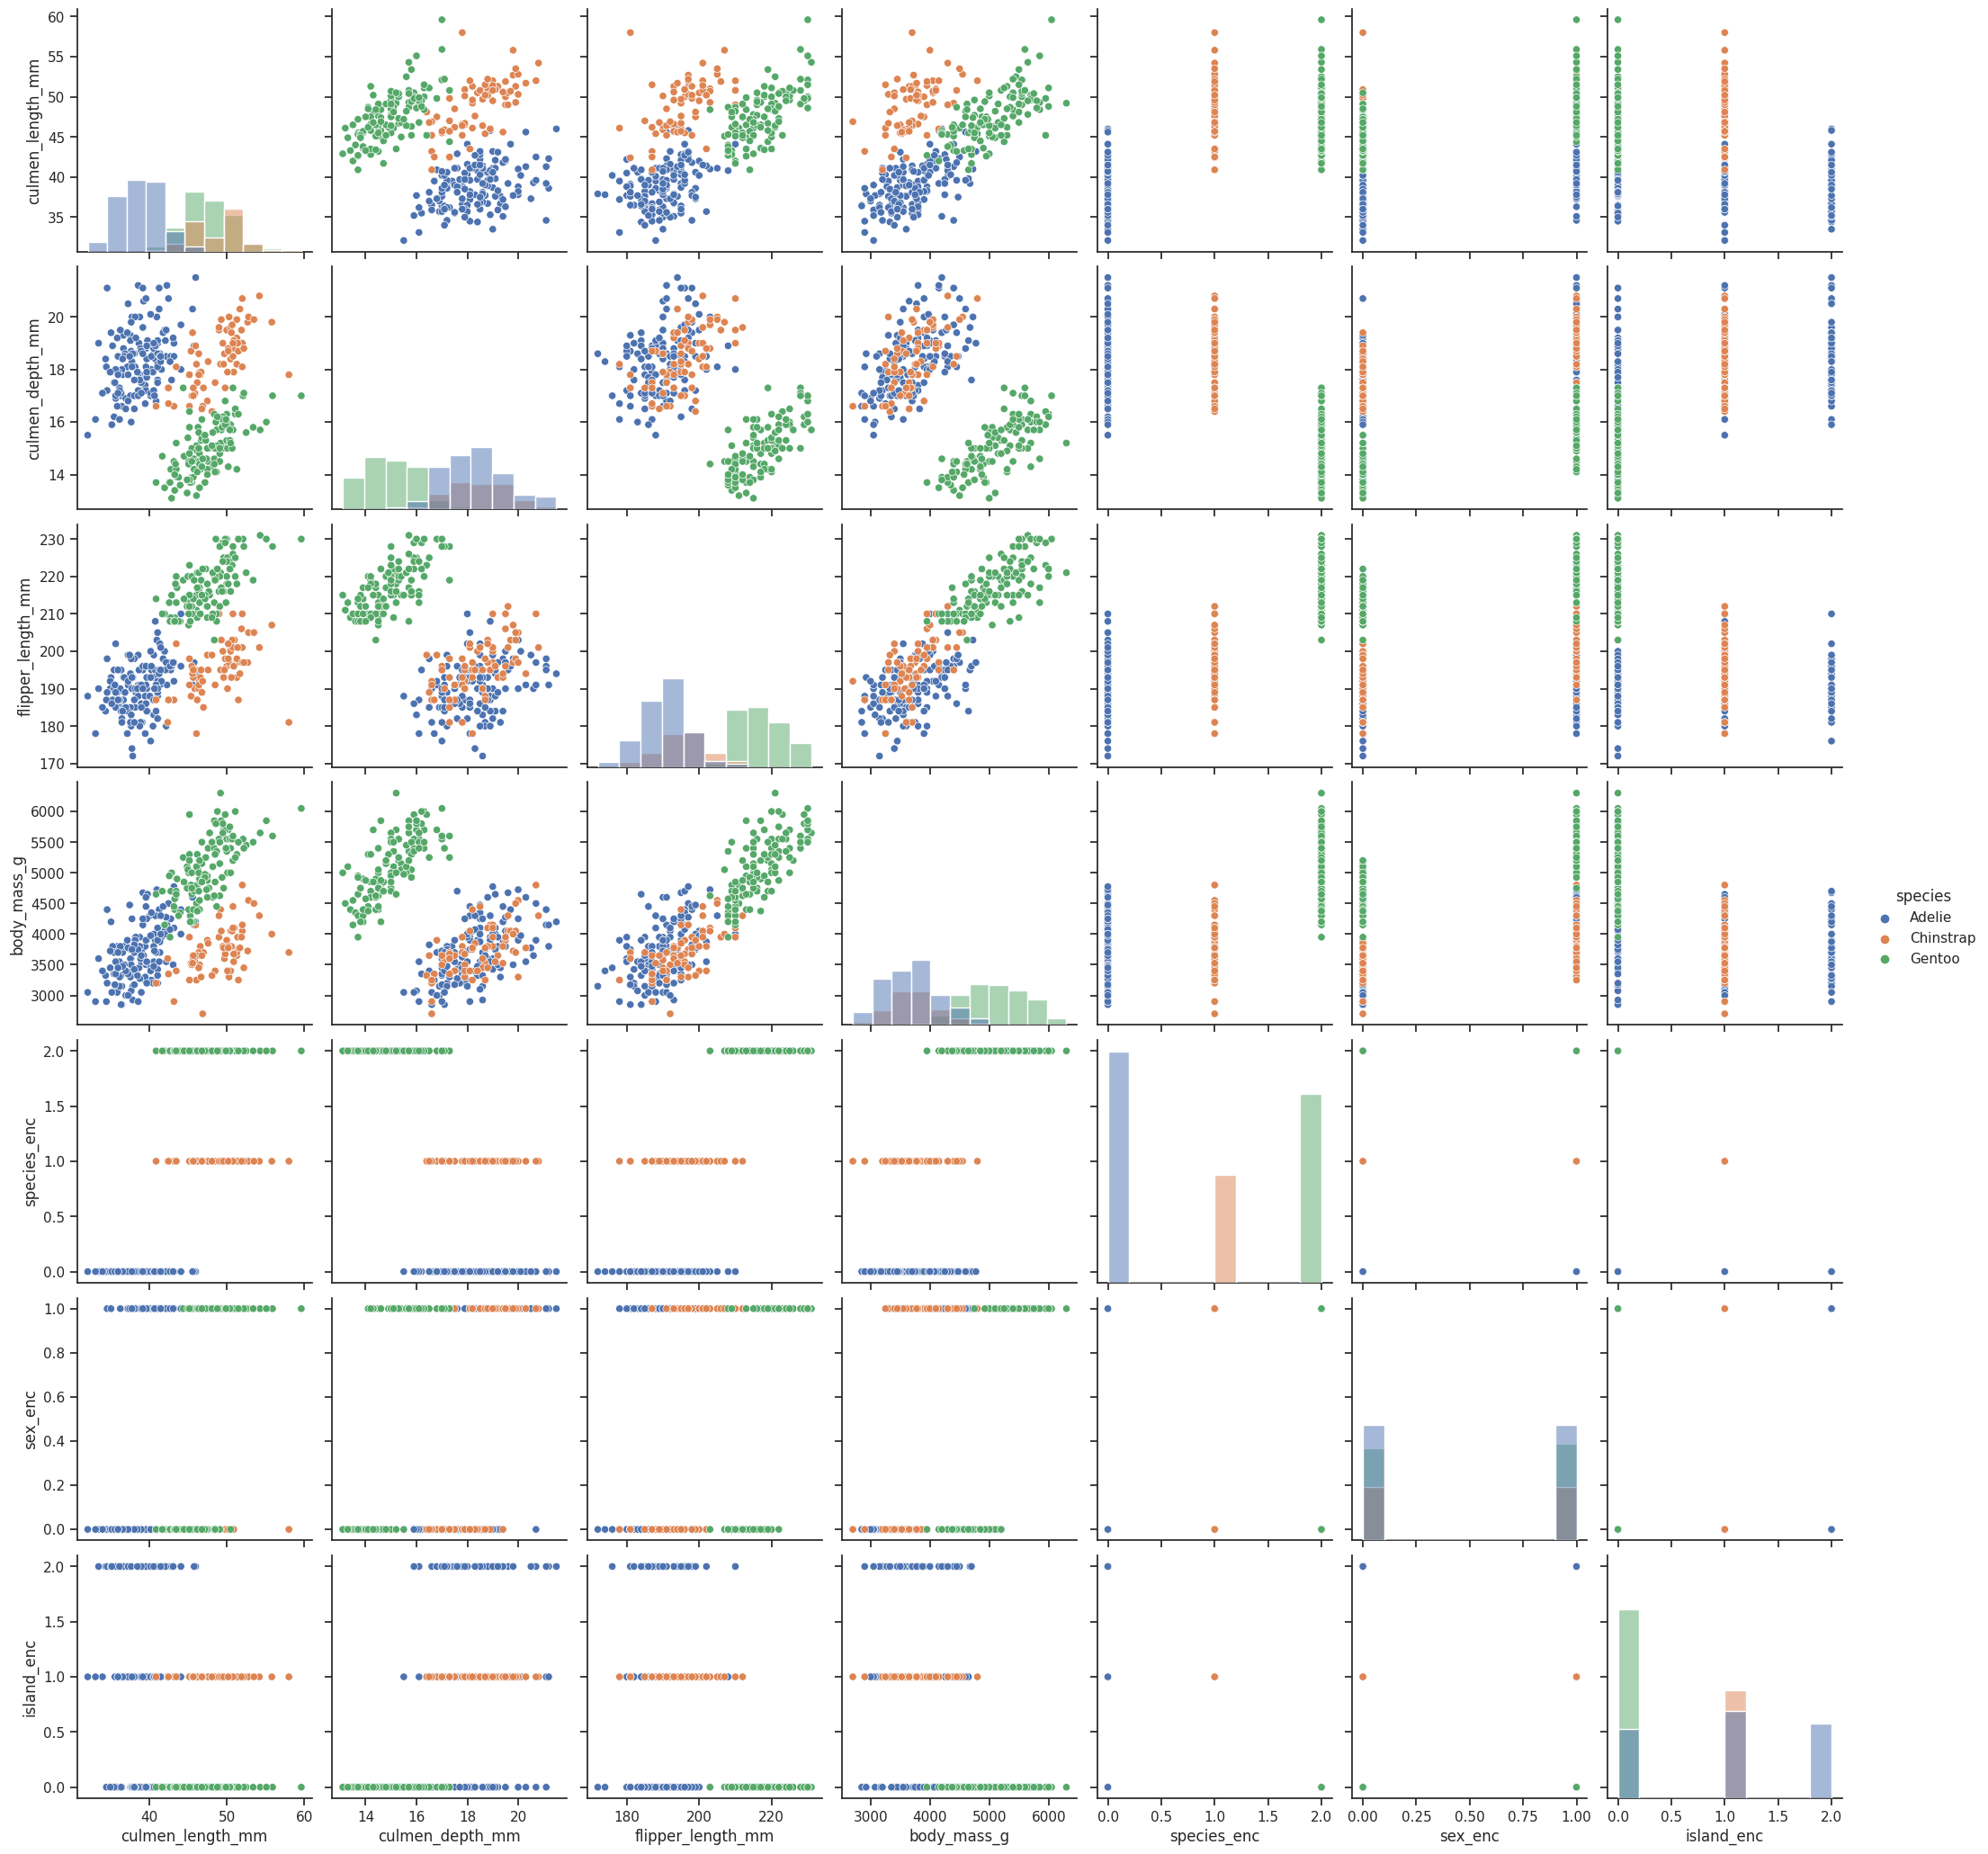

In [ ]:
sns.pairplot(data=df, hue='species', size=3, diag_kind='hist')

/tmp/ipykernel_515/621126171.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<AxesSubplot: >

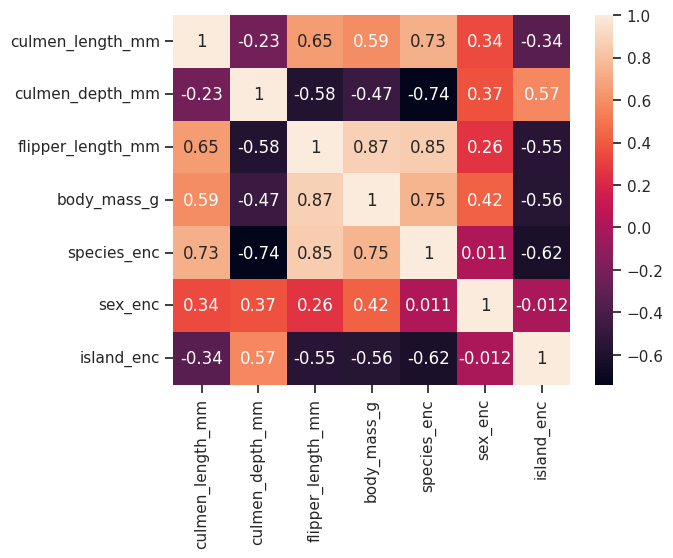

In [ ]:
sns.heatmap(df.corr(), annot=True)

<AxesSubplot: xlabel='culmen_length_mm', ylabel='Count'>

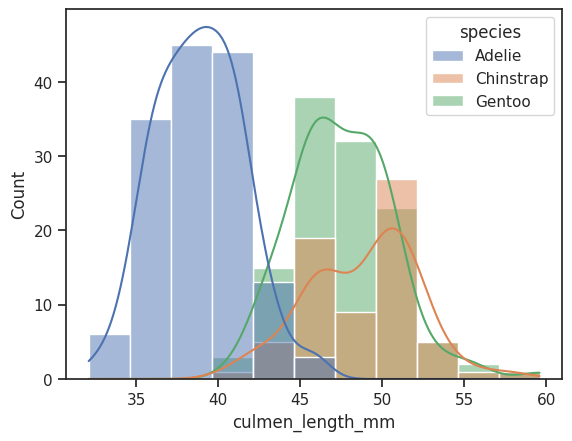

In [ ]:
sns.histplot(data=df, x='culmen_length_mm', hue='species', kde=True)

<AxesSubplot: xlabel='culmen_length_mm', ylabel='Density'>

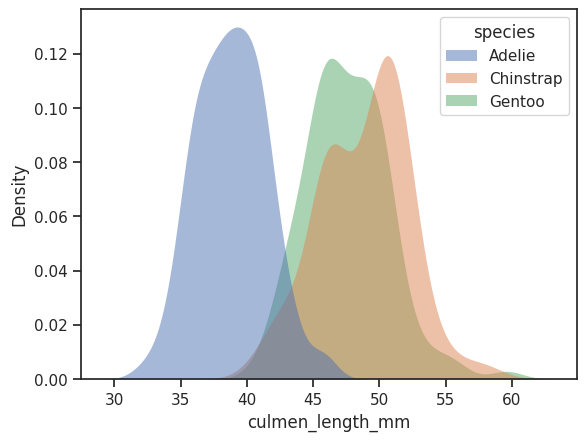

In [ ]:
sns.kdeplot(data=df, x="culmen_length_mm", hue="species", fill=True, common_norm=False, alpha=.5, linewidth=0,)

## KNeighborsClassifier

### Séparation des données

Séparer le jeu de données :
- X : les variables
- y : la cible

In [157]:
# Cible
# Garder uniquement la colonne cible
y = df['species_enc']

In [158]:
# On garde 4 colonnes
X_neigh = df.drop(['species', 'species_enc', 'sex', 'sex_enc', 'island', 'island_enc'], axis=1)

In [159]:
# Colonnes
X_neigh_col_names = list(X_neigh.columns)
X_neigh_col_names

['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

### Train Test Split

In [160]:
from sklearn.model_selection import train_test_split

# Split les données, retourne DataFrame ou ndarray
X_train, X_test, y_train, y_test = train_test_split(X_neigh, y, test_size=0.3, random_state=3)

### Mise à l'échelle

In [161]:
from sklearn.preprocessing import StandardScaler

# X_train
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### GridSearchCV

In [163]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

def neigh(X_train, X_test, y_train, y_test):
    """Function that returns the best KNN Model with its parameters."""

    param_grid = {'n_neighbors' : np.arange(1, 40), 'metric' : ['euclidean', 'manhattan']}
    grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
    grid.fit(X_train, y_train)

    # Best model
    model_best = grid.best_estimator_
    model_best_params = grid.best_params_
    # Prediction
    y_neigh_predict = model_best.predict(X_test)
    # Score du meilleur modèle
    train_score = model_best.score(X_train, y_train)
    test_score = model_best.score(X_test, y_test)
    # RMSE
    neigh_rmse = np.sqrt(mean_squared_error(y_test, y_neigh_predict))

    print('Train Score : ', train_score) # Coefficient de determination
    print('Test Score : ', test_score)
    print("Grid best score : ", grid.best_score_)
    print("Grid best params : ", model_best_params)
    print('RMSE : ', neigh_rmse)

    return model_best, model_best_params

In [165]:
model_best_neigh, model_best_neigh_params = neigh(X_train_scaled, X_test_scaled, y_train, y_test)

Train Score :  0.9914163090128756
Test Score :  0.99
Grid best score :  0.9828862164662351
Grid best params :  {'metric': 'euclidean', 'n_neighbors': 5}
RMSE :  0.1


# Arbre de décision

### Séparation des données

In [ ]:
X_tree = df.drop(['species', 'species_enc', 'sex', 'island'], axis=1)

In [ ]:
# Colonnes
X_tree_col_names = list(X_tree.columns)
X_tree_col_names

['culmen_length_mm',
 'culmen_depth_mm',
 'flipper_length_mm',
 'body_mass_g',
 'sex_enc',
 'island_enc']

### Train Test Split

In [ ]:
# Split les données, retourne DataFrame ou ndarray
X_tree_train, X_tree_test, y_tree_train, y_tree_test = train_test_split(X_tree, y, test_size=0.3, random_state=3)

### Mise à l'échelle

In [ ]:
scaler_tree = StandardScaler()
X_tree_train_scaled = scaler_tree.fit_transform(X_tree_train)
X_tree_test_scaled = scaler_tree.transform(X_tree_test)

### Modèle

In [ ]:
from sklearn.tree import DecisionTreeClassifier

def tree(X_train, X_test, y_train, y_test):
    """Function that returns the best KNN Model with its parameters."""

    params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
    grid = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
    grid.fit(X_train, y_train)

    # Best model
    model_best = grid.best_estimator_
    model_best_params = grid.best_params_
    # Prediction
    y_neigh_predict = model_best.predict(X_test)
    # Score du meilleur modèle
    train_score = model_best.score(X_train, y_train)
    test_score = model_best.score(X_test, y_test)
    # RMSE
    neigh_rmse = np.sqrt(mean_squared_error(y_test, y_neigh_predict))

    print('Train Score : ', train_score) # Coefficient de determination
    print('Test Score : ', test_score)
    print("Grid best score : ", grid.best_score_)
    print("Grid best params : ", model_best_params)
    print('RMSE : ', neigh_rmse)

    return model_best, model_best_params

In [ ]:
model_best_tree, model_best_tree_params = tree(X_tree_train_scaled, X_tree_test_scaled, y_tree_train, y_tree_test)

Fitting 3 folds for each of 294 candidates, totalling 882 fits
Train Score :  0.9957081545064378
Test Score :  0.94
Grid best score :  0.96997446997447
Grid best params :  {'max_leaf_nodes': 7, 'min_samples_split': 2}
RMSE :  0.3


## KNN - Deux colonnes

### Separation des données

In [166]:
X_neigh_2 = df.drop(['species', 'island', 'culmen_depth_mm', 'body_mass_g', 'sex', 'species_enc', 'sex_enc', 'island_enc'], axis=1)
y_neigh_2 = df['species_enc']

In [167]:
# Saving columns informations in a DataFrame
X_neigh_2_info = X_neigh_2.describe()

# Colonnes
X_neigh_2_col_names = list(X_neigh_2.columns)
X_neigh_2_col_names

In [168]:
# Train test split
X_neigh_2_train, X_neigh_2_test, y_neigh_2_train, y_neigh_2_test = train_test_split(X_neigh_2, y, test_size=0.3, random_state=3)

In [169]:
# Mise à l'échelle
scaler_neigh_2 = StandardScaler()
X_neigh_2_train_scaled = scaler_neigh_2.fit_transform(X_neigh_2_train)
X_neigh_2_test_scaled = scaler_neigh_2.transform(X_neigh_2_test)

In [170]:
# Modèle
model_best_neigh_2, model_best_neigh_2_params = neigh(X_neigh_2_train_scaled, X_neigh_2_test_scaled, y_neigh_2_train, y_neigh_2_test)

Train Score :  0.9742489270386266
Test Score :  0.96
Grid best score :  0.9616096207215541
Grid best params :  {'metric': 'manhattan', 'n_neighbors': 5}
RMSE :  0.2645751311064591


## Ensemble learning

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
def bag(X_train, X_test, y_train, y_test):
    param_grid = {'estimator' : [KNeighborsClassifier(), DecisionTreeClassifier()], 'n_estimators' : np.arange(2, 20)}
    grid = GridSearchCV(BaggingClassifier(), param_grid, cv=5)
    grid.fit(X_train, y_train)

    # Best model
    model_best = grid.best_estimator_
    model_best_params = grid.best_params_
    # Prediction
    y_neigh_predict = model_best.predict(X_test)
    # Score du meilleur modèle
    train_score = model_best.score(X_train, y_train)
    test_score = model_best.score(X_test, y_test)
    # RMSE
    neigh_rmse = np.sqrt(mean_squared_error(y_test, y_neigh_predict))

    print('Train Score : ', train_score) # Coefficient de determination
    print('Test Score : ', test_score)
    print("Grid best score : ", grid.best_score_)
    print("Grid best params : ", model_best_params)
    print('RMSE : ', neigh_rmse)

    return model_best, model_best_params

In [ ]:
model_best_bag, model_best_bag_params = bag(X_neigh_2_train_scaled, X_neigh_2_test_scaled, y_neigh_2_train, y_neigh_2_test)

Train Score :  0.9699570815450643
Test Score :  0.96
Grid best score :  0.9658649398704903
Grid best params :  {'estimator': KNeighborsClassifier(), 'n_estimators': 3}
RMSE :  0.2645751311064591


## Export du modèle

Exporter le modèle avec joblib ou Pickle. Il faut exporter :
- Le modèle
- Le scaler
- le nom des colonnes X
- les valeurs possibles de la 'target' (si catégorie)

In [ ]:
import pickle

dict_export = {}
dict_export['model_best_neigh_2'] = model_best_neigh_2
dict_export['scaler_neigh_2'] = scaler_neigh_2
dict_export['X_neigh_2_info'] = X_neigh_2_info
dict_export['labelencoder_species'] = labelencoder_species

pickle_out = open("model.pkl","wb")
pickle.dump(dict_export, pickle_out)
pickle_out.close()

In [ ]:
X_neigh_2_info

,culmen_length_mm,flipper_length_mm
count,333.000000,333.000000
mean,43.992793,200.966967
std,5.468668,14.015765
min,32.100000,172.000000
25%,39.500000,190.000000
50%,44.500000,197.000000
75%,48.600000,213.000000
max,59.600000,231.000000
